<a href="https://colab.research.google.com/github/hrishikesh1105/alzheimer_detection/blob/main/Copy_of_Alzheimer_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Kaggle'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive/Kaggle'

/content/drive/MyDrive/Kaggle


In [ ]:
#!kaggle datasets download -d ninadaithal/imagesoasis

In [ ]:
#!unzip \*.zip  && rm *.zip

In [ ]:
import keras
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
import PIL
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from PIL import Image
from keras.layers import Conv2D,Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from tqdm import tqdm
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.utils.class_weight import compute_class_weight
from sklearn.linear_model import LogisticRegression

In [ ]:
# non_demented = []
very_mild_demented = []
mild_demented = []
moderate_demented = []

# for dirname, _, filenames in os.walk('/content/drive/MyDrive/Kaggle/Data/Non Demented'):
#     for filename in filenames:
#         non_demented.append(os.path.join(dirname, filename))

for dirname, _, filenames in os.walk('/content/drive/MyDrive/Kaggle/Data/Very mild Dementia'):
    for filename in filenames:
        very_mild_demented.append(os.path.join(dirname, filename))

for dirname, _, filenames in os.walk('/content/drive/MyDrive/Kaggle/Data/Mild Dementia'):
    for filename in filenames:
        mild_demented.append(os.path.join(dirname, filename))

for dirname, _, filenames in os.walk('/content/drive/MyDrive/Kaggle/Data/Moderate Dementia'):
    for filename in filenames:
        moderate_demented.append(os.path.join(dirname, filename))

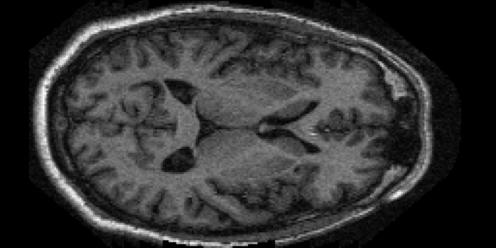

In [ ]:
import PIL
from PIL import Image
PIL.Image.open(str(non_demented[0]))

In [ ]:
print(len(non_demented))
print(len(mild_demented))
print(len(moderate_demented))
print(len(very_mild_demented))

67222
5002
488
13725


In [ ]:
non_demented = non_demented[0:488]
mild_demented = mild_demented[0:488]
moderate_demented = moderate_demented[0:488]
very_mild_demented = very_mild_demented[0:488]

In [ ]:
images = []
labels = []
for subfolder in tqdm(os.listdir('/content/drive/MyDrive/Kaggle')):
    subfolder_path = os.path.join('/content/drive/MyDrive/Kaggle', subfolder)
    for folder in os.listdir(subfolder_path):
        subfolder_path2=os.path.join(subfolder_path,folder)
        for image_filename in os.listdir(subfolder_path2):
            image_path = os.path.join(subfolder_path2, image_filename)
            images.append(image_path)
            labels.append(folder)
df = pd.DataFrame({'image': images, 'label': labels})
df

100%|██████████| 2/2 [00:27<00:00, 13.79s/it]


,image,label
0,/content/drive/MyDrive/Kaggle/Data/Mild Dement...,Mild Dementia
1,/content/drive/MyDrive/Kaggle/Data/Mild Dement...,Mild Dementia
2,/content/drive/MyDrive/Kaggle/Data/Mild Dement...,Mild Dementia
3,/content/drive/MyDrive/Kaggle/Data/Mild Dement...,Mild Dementia
4,/content/drive/MyDrive/Kaggle/Data/Mild Dement...,Mild Dementia
...,...,...
86432,/content/drive/MyDrive/Kaggle/Data/Very mild D...,Very mild Dementia
86433,/content/drive/MyDrive/Kaggle/Data/Very mild D...,Very mild Dementia
86434,/content/drive/MyDrive/Kaggle/Data/Very mild D...,Very mild Dementia
86435,/content/drive/MyDrive/Kaggle/Data/Very mild D...,Very mild Dementia


<ipython-input-12-bc0bb9f3cbe0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df.label,palette='Set1')


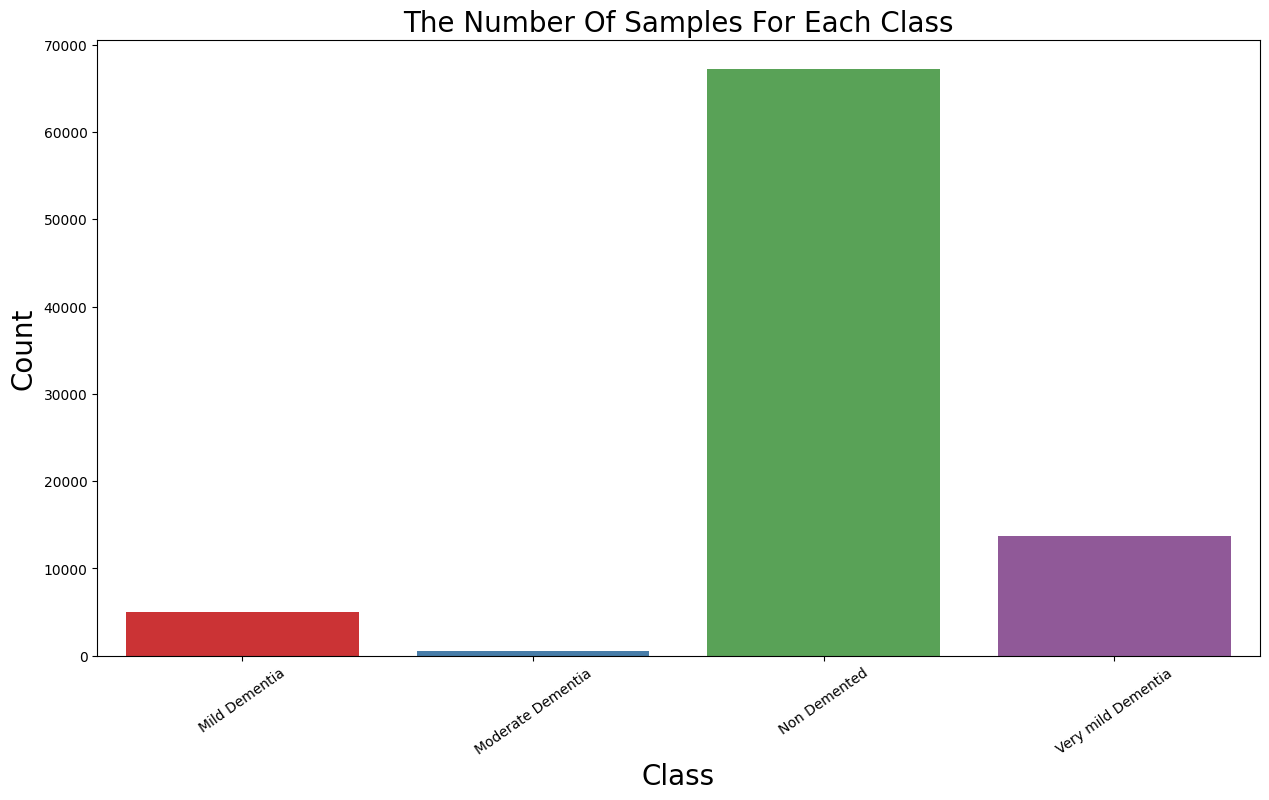

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x=df.label,palette='Set1')
ax.set_xlabel("Class",fontsize=20)
ax.set_ylabel("Count",fontsize=20)
plt.title('The Number Of Samples For Each Class',fontsize=20)
plt.grid(False)
plt.xticks(rotation=35)
plt.show()

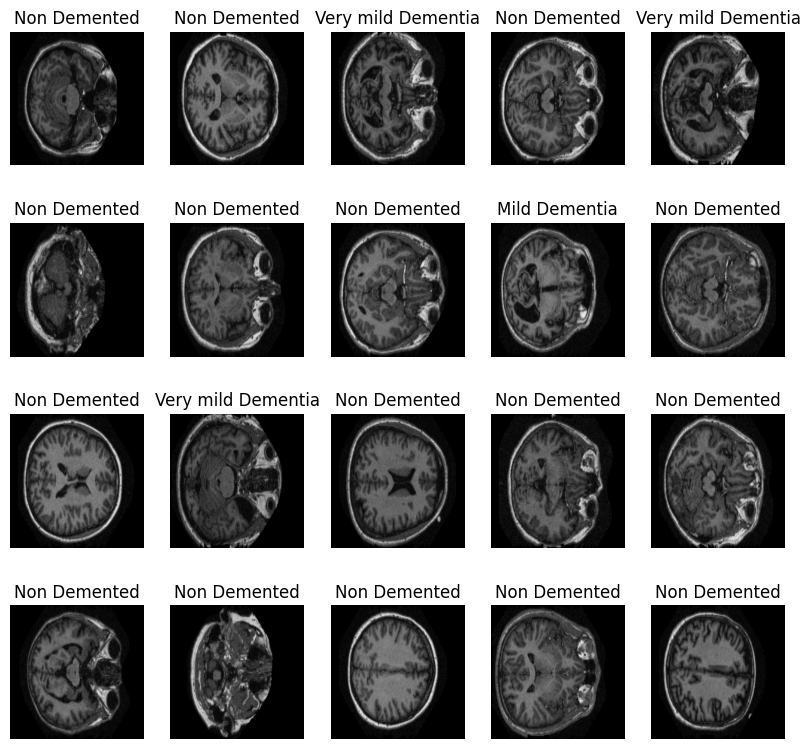

In [ ]:
plt.figure(figsize=(10,12))
for n,i in enumerate(np.random.randint(0,len(df),20)):
    plt.subplot(5,5,n+1)
    img=cv2.imread(df.image[i])
    img=cv2.resize(img,(224,224))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.title(df.label[i],fontsize=12)

In [ ]:
#One Hot Encoding
#0 -> non_demented
#1 -> mild_dementia
#2 -> moderate_dementia
#3 -> very_mild_dementia


In [ ]:
encoder= OneHotEncoder()
encoder.fit([[0],[1],[2],[3]])

OneHotEncoder()

In [ ]:
data = []
result = []
for s in non_demented:
    img = Image.open(s)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

for s in mild_demented:
    img = Image.open(s)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

for s in moderate_demented:
    img = Image.open(s)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[2]]).toarray())

for s in very_mild_demented:
    img = Image.open(s)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[3]]).toarray())

In [ ]:
# Convert lists to NumPy arrays for easier manipulation
data = np.array(data)
result = np.array(result)

# Calculate the midpoint of the dataset
midpoint = len(data) // 2

# Split the data and result into two equal halves
data1, data2 = data[:midpoint], data[midpoint:]
result1, result2 = result[:midpoint], result[midpoint:]

# Print the shapes of the splits to verify
print("Data1 shape:", data1.shape)
print("Data2 shape:", data2.shape)
print("Result1 shape:", result1.shape)
print("Result2 shape:", result2.shape)


Data1 shape: (976, 128, 128, 3)
Data2 shape: (976, 128, 128, 3)
Result1 shape: (976, 1, 4)
Result2 shape: (976, 1, 4)


CREATING CNN MODEL


In [ ]:
# Define the model
def create_model():
    model = models.Sequential([
        layers.Input(shape=(128, 128, 3)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(4, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to train and evaluate the model
def train_model(data, result):
    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data, result, test_size=0.2, random_state=42)

    # Create and train the model
    model = create_model()
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

    # Predict on the test set
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)

    # Calculate metrics
    accuracy = accuracy_score(y_test_classes, y_pred_classes)
    precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
    recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
    f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

    return history, accuracy, precision, recall, f1


In [ ]:
# Prepare datasets
data1 = np.array(data1)
result1 = np.array(result1)

data2 = np.array(data2)
result2 = np.array(result2)

# Train the model on data1/result1 and data2/result2
history1, acc1, prec1, rec1, f1_1 = train_model(data1, result1)
history2, acc2, prec2, rec2, f1_2 = train_model(data2, result2)

# Compute average metrics
avg_accuracy = (acc1 + acc2) / 2
avg_precision = (prec1 + prec2) / 2
avg_recall = (rec1 + rec2) / 2
avg_f1 = (f1_1 + f1_2) / 2

# Print Average Metrics
print("Neural Network - Average Metrics:")
print(f"Accuracy: {avg_accuracy:.4f}")
print(f"Precision: {avg_precision:.4f}")
print(f"Recall: {avg_recall:.4f}")
print(f"F1 Score: {avg_f1:.4f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step
Neural Network - Average Metrics:
Accuracy: 0.9974
Precision: 0.9975
Recall: 0.9974
F1 Score: 0.9974


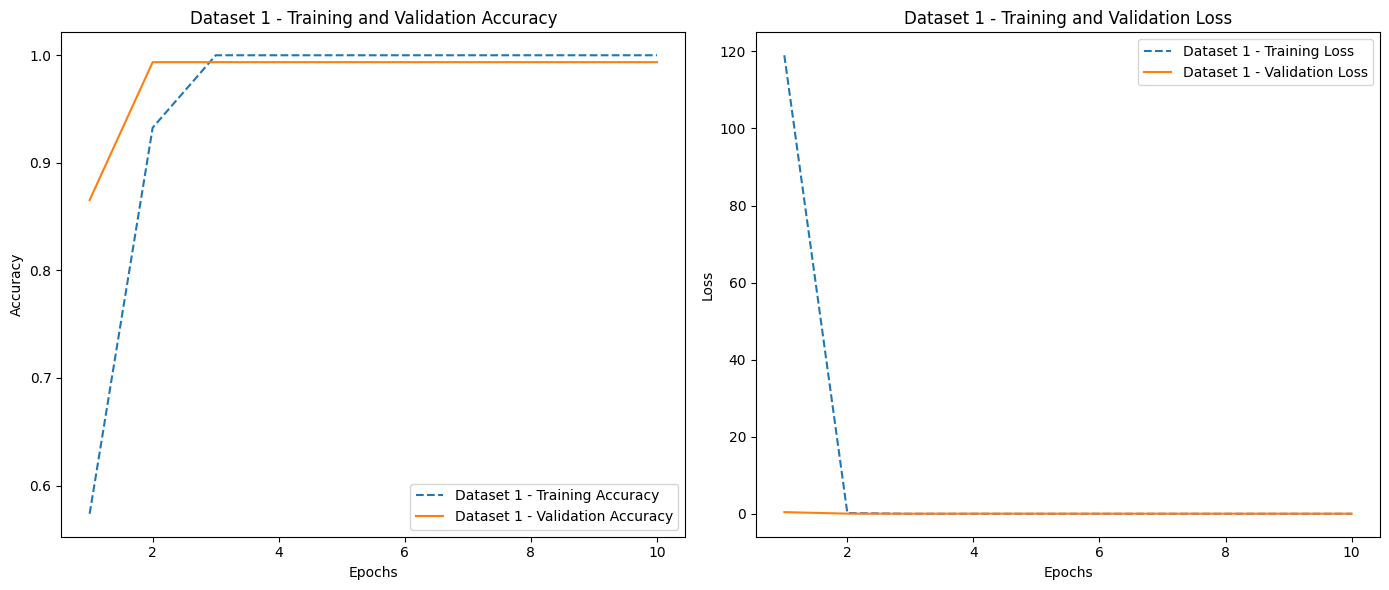

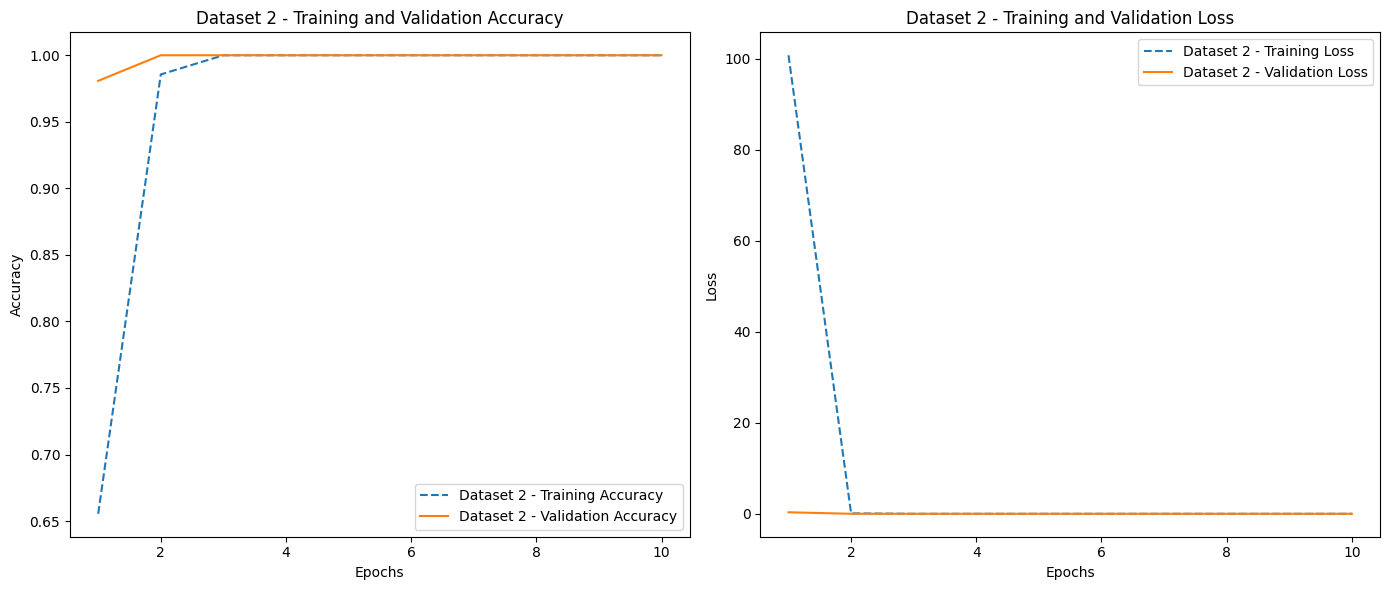

In [ ]:
def plot_metrics(history, dataset_name):
    epochs = range(1, len(history.history['accuracy']) + 1)

    # Plot Accuracy
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['accuracy'], label=f'{dataset_name} - Training Accuracy', linestyle='--')
    plt.plot(epochs, history.history['val_accuracy'], label=f'{dataset_name} - Validation Accuracy')
    plt.title(f'{dataset_name} - Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['loss'], label=f'{dataset_name} - Training Loss', linestyle='--')
    plt.plot(epochs, history.history['val_loss'], label=f'{dataset_name} - Validation Loss')
    plt.title(f'{dataset_name} - Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot metrics for Dataset 1
plot_metrics(history1, "Dataset 1")

# Plot metrics for Dataset 2
plot_metrics(history2, "Dataset 2")

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Flatten images
X = np.array([img.flatten() for img in data])
y = np.array(result).argmax(axis=1)  # Convert one-hot to class labels

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM Model with Grid Search
svm_model = SVC()
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['rbf', 'linear']}
grid_svm = GridSearchCV(svm_model, param_grid_svm, cv=3)
grid_svm.fit(X_train, y_train)
svm_best = grid_svm.best_estimator_
y_pred_svm = svm_best.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

# Logistic Regression Model with Grid Search
log_reg = LogisticRegression(max_iter=1000)
param_grid_log = {'C': [0.1, 1, 10]}
grid_log = GridSearchCV(log_reg, param_grid_log, cv=3)
grid_log.fit(X_train, y_train)
log_best = grid_log.best_estimator_
y_pred_log = log_best.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))

SVM Accuracy: 0.9974424552429667
Logistic Regression Accuracy: 0.9872122762148338


SVM

In [ ]:
# Flatten the image data for SVM and Logistic Regression
X1 = np.array([img.flatten() for img in data1])  # Dataset 1
y1 = np.array(result1).argmax(axis=1)  # Convert one-hot to class labels for Dataset 1

X2 = np.array([img.flatten() for img in data2])  # Dataset 2
y2 = np.array(result2).argmax(axis=1)  # Convert one-hot to class labels for Dataset 2

# Train-Test Split for Dataset 1
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Train-Test Split for Dataset 2
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [ ]:
def train_svm(X_train, X_test, y_train, y_test):
    # Define parameter grid for SVM, expanding the range of `C` and ensuring the model isn't overfitting
    param_grid = {
        'C': [0.01, 0.1, 1, 10, 100],  # Include smaller values of C to encourage regularization
        'kernel': ['rbf', 'linear'],
        'gamma': ['scale', 'auto']  # Adding gamma for the 'rbf' kernel
    }

    # SVM model with balanced class weights to handle imbalanced datasets
    svm_model = SVC(class_weight='balanced')

    # StratifiedKFold to ensure class distribution remains balanced during cross-validation
    cv = StratifiedKFold(n_splits=5)

    # Grid Search for Hyperparameter Tuning with more cross-validation folds to reduce overfitting
    grid_svm = GridSearchCV(svm_model, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
    grid_svm.fit(X_train, y_train)

    # Best Model
    svm_best = grid_svm.best_estimator_

    # Predict
    y_pred = svm_best.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    return accuracy, precision, recall, f1, grid_svm.best_params_


In [ ]:
# Train and evaluate SVM for Dataset 1
svm_metrics1 = train_svm(X1_train, X1_test, y1_train, y1_test)

# Train and evaluate SVM for Dataset 2
svm_metrics2 = train_svm(X2_train, X2_test, y2_train, y2_test)

In [ ]:
print("SVM - Average Metrics:")
print(f"Accuracy: {(svm_metrics1[0] + svm_metrics2[0]) / 2:.4f}")
print(f"Precision: {(svm_metrics1[1] + svm_metrics2[1]) / 2:.4f}")
print(f"Recall: {(svm_metrics1[2] + svm_metrics2[2]) / 2:.4f}")
print(f"F1 Score: {(svm_metrics1[3] + svm_metrics2[3]) / 2:.4f}")

SVM - Average Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


LOGISTIC REGRESSION


In [ ]:
def train_lr(X_train, X_test, y_train, y_test):
    # Define parameter grid for Logistic Regression
    param_grid = {
        'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter (smaller C => stronger regularization)
        'solver': ['liblinear', 'lbfgs']  # Solvers appropriate for smaller datasets and binary/multiclass
    }

    # Logistic Regression model with balanced class weights
    logreg_model = LogisticRegression(class_weight='balanced', max_iter=1000)

    # StratifiedKFold for cross-validation
    cv = StratifiedKFold(n_splits=5)

    # Grid Search for Hyperparameter Tuning
    grid_logreg = GridSearchCV(logreg_model, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
    grid_logreg.fit(X_train, y_train)

    # Best Model
    logreg_best = grid_logreg.best_estimator_

    # Predict
    y_pred = logreg_best.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    return accuracy, precision, recall, f1, grid_logreg.best_params_

In [ ]:
# Train and evaluate LR for Dataset 1
lr_metrics1 = train_lr(X1_train, X1_test, y1_train, y1_test)

# Train and evaluate LR for Dataset 2
lr_metrics2 = train_lr(X2_train, X2_test, y2_train, y2_test)

# Average Metrics
print("LR - Average Metrics:")
print(f"Accuracy: {(lr_metrics1[0] + lr_metrics2[0]) / 2:.4f}")
print(f"Precision: {(lr_metrics1[1] + lr_metrics2[1]) / 2:.4f}")
print(f"Recall: {(lr_metrics1[2] + lr_metrics2[2]) / 2:.4f}")
print(f"F1 Score: {(lr_metrics1[3] + lr_metrics2[3]) / 2:.4f}")

LR - Average Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
